# চ্যালেঞ্জ: ডেটা সায়েন্স সম্পর্কিত টেক্সট বিশ্লেষণ

> *এই নোটবুকে, আমরা মেশিন লার্নিং সম্পর্কিত উইকিপিডিয়া নিবন্ধ ব্যবহার করে বিভিন্ন URL নিয়ে পরীক্ষা-নিরীক্ষা করি। আপনি দেখতে পাবেন যে, ডেটা সায়েন্সের তুলনায় এই নিবন্ধে অনেক বেশি পরিভাষা রয়েছে, যা বিশ্লেষণকে আরও জটিল করে তোলে। কীওয়ার্ড এক্সট্রাকশনের পরে কিছু সাধারণ কিন্তু অর্থহীন শব্দগুচ্ছ বাদ দেওয়ার জন্য আমাদের ডেটা পরিষ্কার করার আরেকটি পদ্ধতি বের করতে হবে।*

এই উদাহরণে, আসুন একটি সহজ অনুশীলন করি যা ঐতিহ্যবাহী ডেটা সায়েন্স প্রক্রিয়ার সমস্ত ধাপ কভার করে। আপনাকে কোনো কোড লিখতে হবে না, আপনি শুধু নিচের সেলগুলোতে ক্লিক করে সেগুলো চালাতে পারেন এবং ফলাফল পর্যবেক্ষণ করতে পারেন। একটি চ্যালেঞ্জ হিসেবে, আপনাকে উৎসাহিত করা হচ্ছে যে আপনি এই কোডটি বিভিন্ন ডেটার সাথে চেষ্টা করুন। 

## লক্ষ্য

এই পাঠে, আমরা ডেটা সায়েন্স সম্পর্কিত বিভিন্ন ধারণা নিয়ে আলোচনা করেছি। আসুন কিছু **টেক্সট মাইনিং** করে আরও সম্পর্কিত ধারণা আবিষ্কার করার চেষ্টা করি। আমরা ডেটা সায়েন্স সম্পর্কিত একটি টেক্সট দিয়ে শুরু করব, সেখান থেকে কীওয়ার্ড বের করব এবং তারপর ফলাফলটি ভিজুয়ালাইজ করার চেষ্টা করব।

টেক্সট হিসেবে, আমি উইকিপিডিয়ার ডেটা সায়েন্স পৃষ্ঠাটি ব্যবহার করব:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## ধাপ ১: ডেটা সংগ্রহ করা

প্রতিটি ডেটা সায়েন্স প্রক্রিয়ার প্রথম ধাপ হলো ডেটা সংগ্রহ করা। আমরা এটি করার জন্য `requests` লাইব্রেরি ব্যবহার করব:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## ধাপ ২: ডেটা রূপান্তর করা

পরবর্তী ধাপ হলো ডেটাকে এমন একটি ফর্মে রূপান্তর করা যা প্রক্রিয়াকরণের জন্য উপযুক্ত। আমাদের ক্ষেত্রে, আমরা পৃষ্ঠার HTML সোর্স কোড ডাউনলোড করেছি এবং এটি সাধারণ টেক্সটে রূপান্তর করতে হবে।

এটি করার অনেক পদ্ধতি রয়েছে। আমরা Python-এর সহজতম বিল্ট-ইন [HTMLParser](https://docs.python.org/3/library/html.parser.html) অবজেক্ট ব্যবহার করব। আমাদের `HTMLParser` ক্লাসটি সাবক্লাস করতে হবে এবং এমন কোড সংজ্ঞায়িত করতে হবে যা HTML ট্যাগগুলোর ভিতরের সমস্ত টেক্সট সংগ্রহ করবে, তবে `<script>` এবং `<style>` ট্যাগগুলো বাদ দিয়ে।


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## ধাপ ৩: অন্তর্দৃষ্টি অর্জন করা

সবচেয়ে গুরুত্বপূর্ণ ধাপ হল আমাদের ডেটাকে এমন একটি রূপে রূপান্তর করা, যেখান থেকে আমরা অন্তর্দৃষ্টি পেতে পারি। আমাদের ক্ষেত্রে, আমরা টেক্সট থেকে কীওয়ার্ড বের করতে চাই এবং দেখতে চাই কোন কীওয়ার্ডগুলো বেশি অর্থবহ।

আমরা কীওয়ার্ড বের করার জন্য [RAKE](https://github.com/aneesha/RAKE) নামক একটি পাইথন লাইব্রেরি ব্যবহার করব। প্রথমে, যদি এই লাইব্রেরি ইনস্টল না করা থাকে, তাহলে এটি ইনস্টল করি:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


মূল কার্যকারিতা `Rake` অবজেক্ট থেকে পাওয়া যায়, যা আমরা কিছু প্যারামিটার ব্যবহার করে কাস্টমাইজ করতে পারি। আমাদের ক্ষেত্রে, আমরা একটি কীওয়ার্ডের ন্যূনতম দৈর্ঘ্য ৫ অক্ষর, ডকুমেন্টে একটি কীওয়ার্ডের ন্যূনতম ফ্রিকোয়েন্সি ৩, এবং একটি কীওয়ার্ডে সর্বাধিক শব্দের সংখ্যা ২ নির্ধারণ করব। অন্যান্য মান নিয়ে পরীক্ষা-নিরীক্ষা করতে এবং ফলাফল পর্যবেক্ষণ করতে স্বাধীন অনুভব করুন।


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

আমরা একটি তালিকা সংগ্রহ করেছি যেখানে শর্তসমূহ এবং তাদের সাথে সম্পর্কিত গুরুত্বের মাত্রা উল্লেখ করা হয়েছে। যেমনটি আপনি দেখতে পাচ্ছেন, সবচেয়ে প্রাসঙ্গিক বিষয়গুলো, যেমন মেশিন লার্নিং এবং বিগ ডেটা, তালিকার শীর্ষস্থানে রয়েছে।

## ধাপ ৪: ফলাফল ভিজুয়ালাইজ করা

মানুষ সাধারণত ভিজুয়াল ফর্মে ডেটা সবচেয়ে ভালোভাবে বুঝতে পারে। তাই কিছু অন্তর্দৃষ্টি পাওয়ার জন্য ডেটা ভিজুয়ালাইজ করা প্রায়ই যৌক্তিক হয়। আমরা পাইথনের `matplotlib` লাইব্রেরি ব্যবহার করে কীওয়ার্ডগুলোর সরল বণ্টন এবং তাদের প্রাসঙ্গিকতা প্লট করতে পারি:


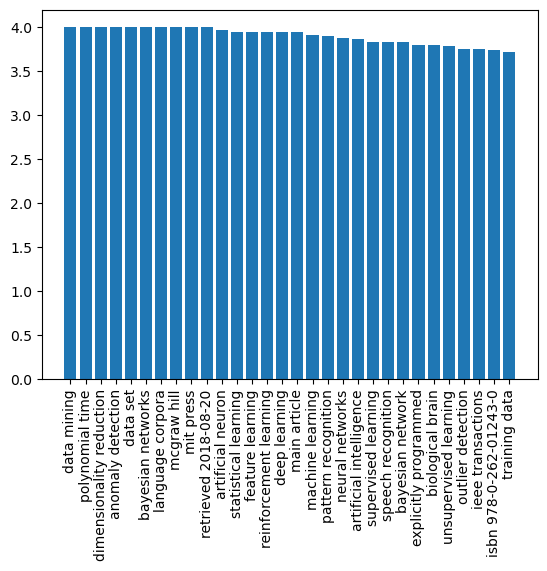

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

তবে, শব্দের ঘনত্ব কল্পনা করার আরও ভালো উপায় রয়েছে - **ওয়ার্ড ক্লাউড** ব্যবহার করা। আমাদের কীওয়ার্ড তালিকা থেকে ওয়ার্ড ক্লাউড আঁকতে আরেকটি লাইব্রেরি ইনস্টল করতে হবে।


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` অবজেক্ট মূল পাঠ্য বা পূর্ব-গণনা করা শব্দের তালিকা তাদের ফ্রিকোয়েন্সি সহ গ্রহণ করার জন্য দায়ী, এবং একটি চিত্র প্রদান করে, যা পরে `matplotlib` ব্যবহার করে প্রদর্শিত হতে পারে:


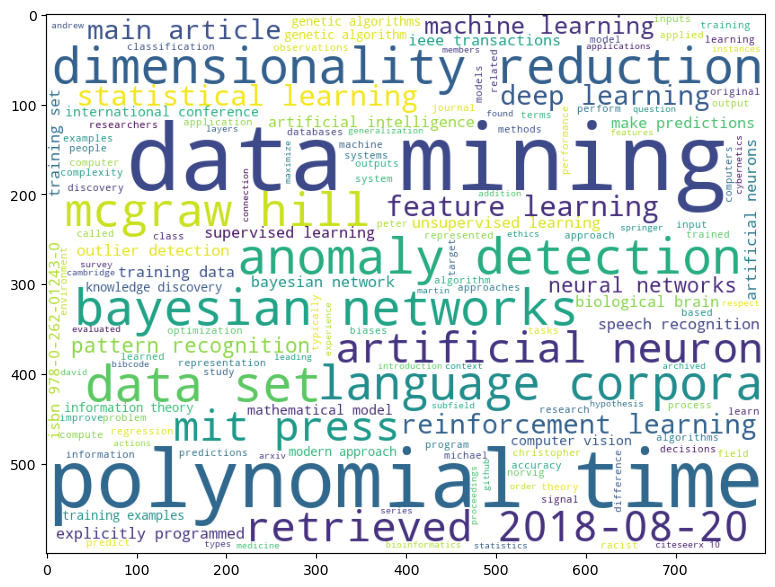

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

আমরা মূল পাঠ্যটিও `WordCloud`-এ পাস করতে পারি - চলুন দেখি আমরা কি একই রকম ফলাফল পেতে সক্ষম:


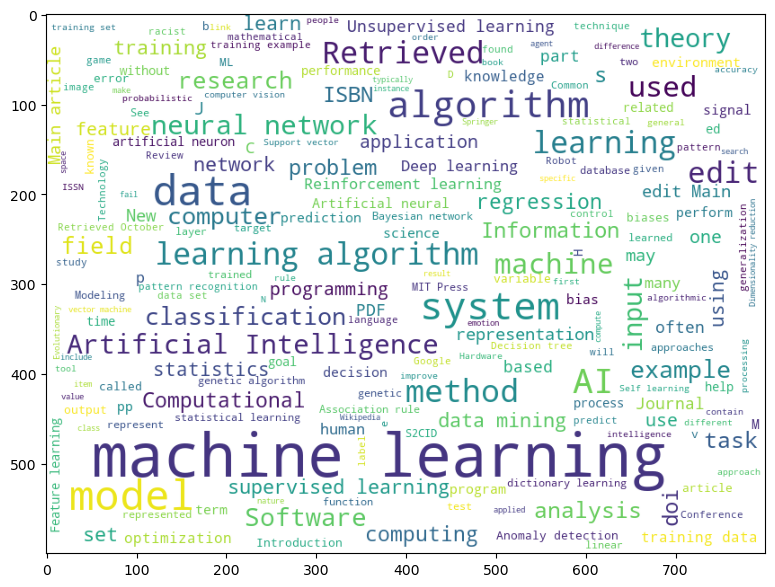

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

আপনি দেখতে পাচ্ছেন যে শব্দ মেঘ (word cloud) এখন আরও আকর্ষণীয় দেখাচ্ছে, তবে এটি অনেক অপ্রাসঙ্গিক শব্দও ধারণ করছে (যেমন `Retrieved on` এর মতো শব্দ)। এছাড়াও, আমরা কম সংখ্যক দুই-শব্দের কীওয়ার্ড পাচ্ছি, যেমন *data scientist* বা *computer science*। এর কারণ হলো RAKE অ্যালগরিদম পাঠ্য থেকে ভালো কীওয়ার্ড বাছাই করার ক্ষেত্রে অনেক বেশি কার্যকর। এই উদাহরণটি ডেটা প্রি-প্রসেসিং এবং পরিষ্কারের গুরুত্বকে তুলে ধরে, কারণ শেষ পর্যন্ত একটি পরিষ্কার চিত্র আমাদের আরও ভালো সিদ্ধান্ত নিতে সাহায্য করবে।

এই অনুশীলনে আমরা একটি সহজ প্রক্রিয়ার মধ্য দিয়ে গিয়েছি, যেখানে উইকিপিডিয়া পাঠ্য থেকে কীওয়ার্ড এবং শব্দ মেঘের আকারে কিছু অর্থ বের করার চেষ্টা করেছি। এই উদাহরণটি বেশ সহজ, তবে এটি খুব ভালোভাবে দেখায় যে ডেটা নিয়ে কাজ করার সময় একজন ডেটা বিজ্ঞানী সাধারণত যেসব ধাপ অনুসরণ করেন, সেগুলো কীভাবে শুরু থেকে (ডেটা সংগ্রহ) শেষ পর্যন্ত (ভিজুয়ালাইজেশন) সম্পন্ন হয়।

আমাদের কোর্সে আমরা এই সমস্ত ধাপগুলো বিস্তারিতভাবে আলোচনা করব।



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিকতার জন্য চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা তার জন্য দায়ী থাকব না।
